<a href="https://colab.research.google.com/github/ibloo1703/TP2_Machine_Learning/blob/main/MachineLearning_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 1

In [2]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Checking for null values
df.isnull().sum()

#The rows with missing values
df.dropna(inplace=True)

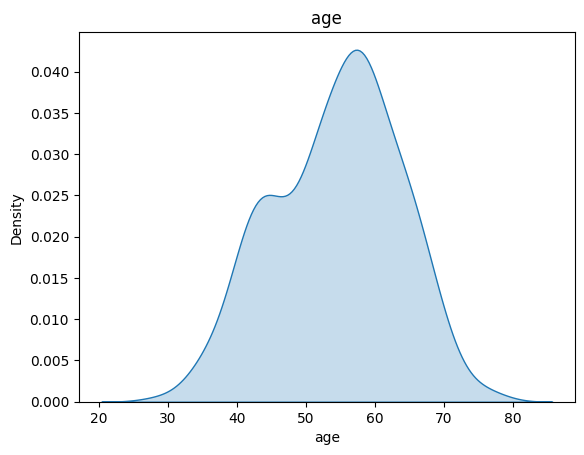

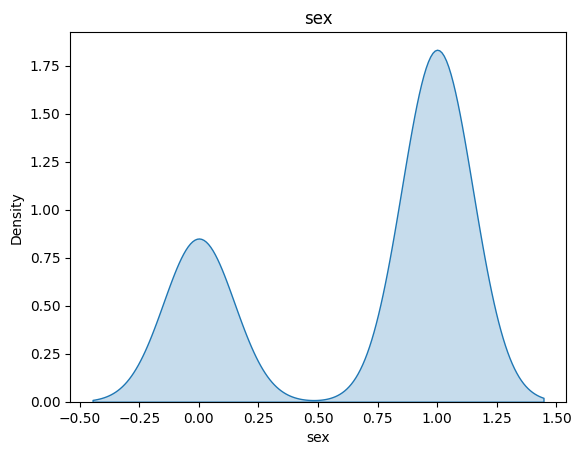

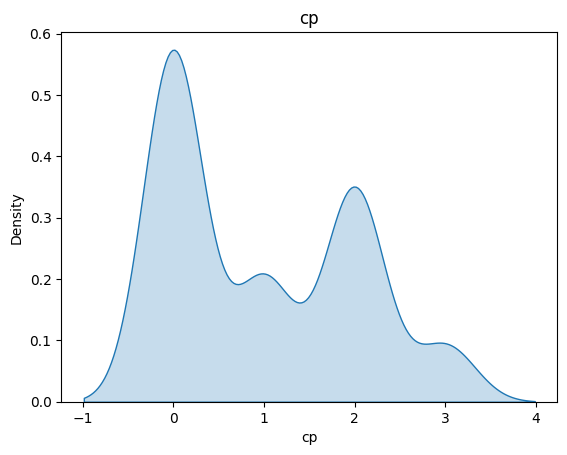

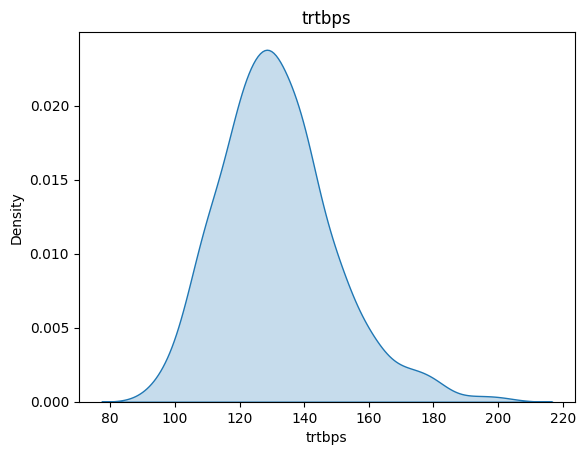

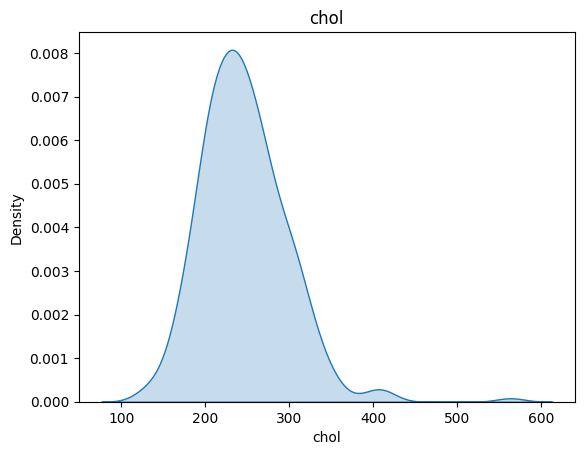

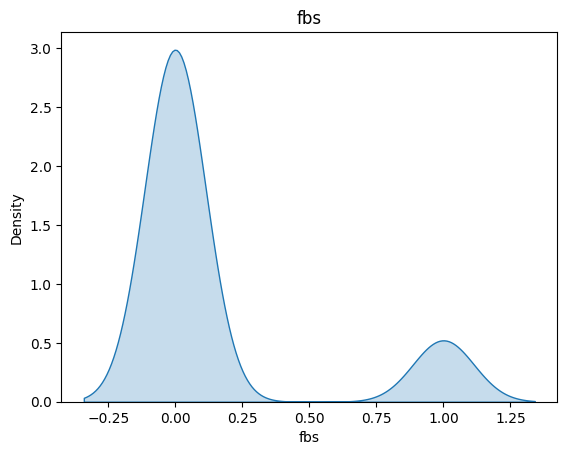

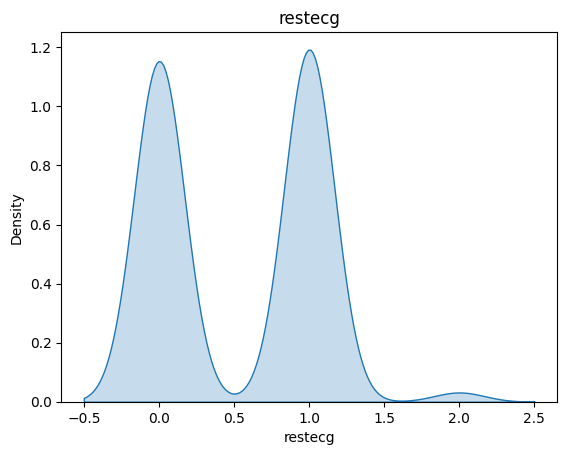

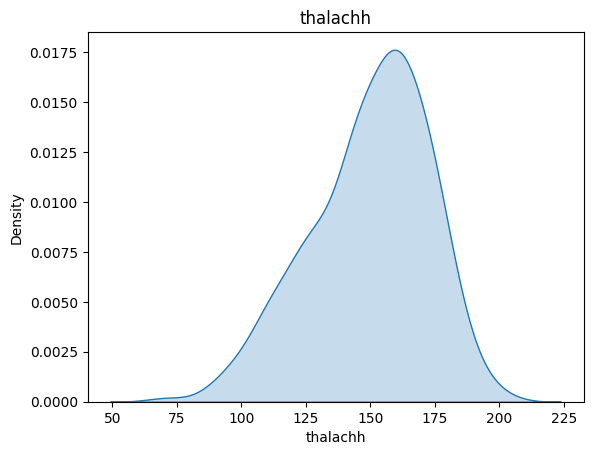

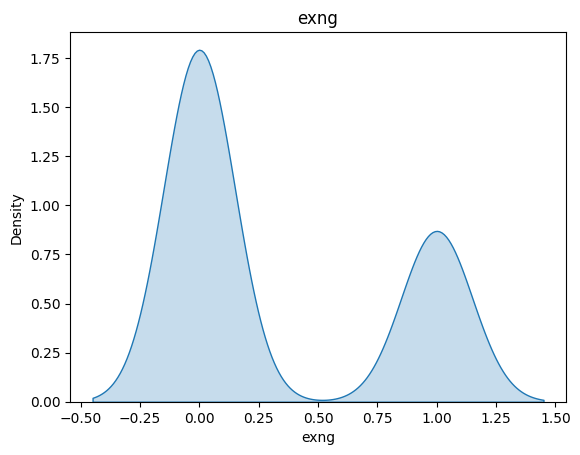

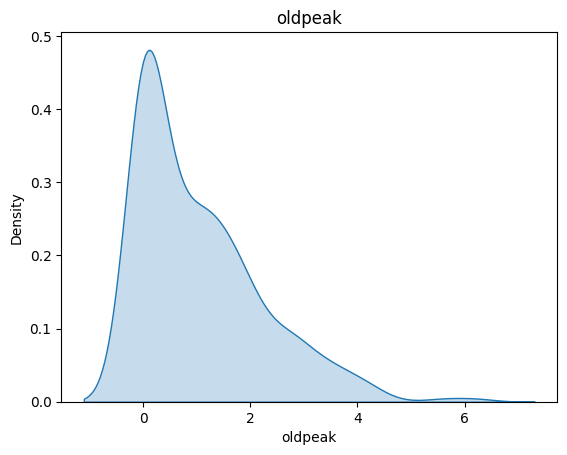

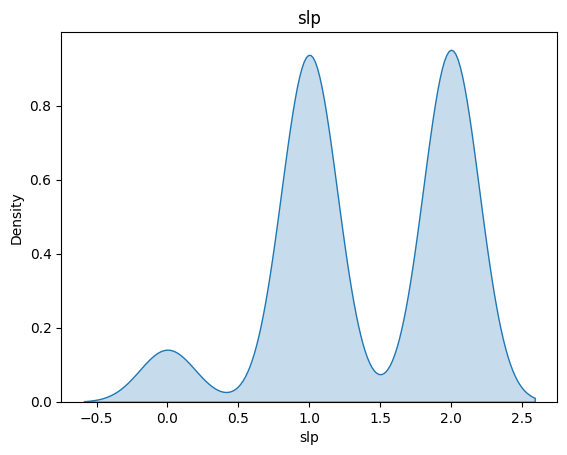

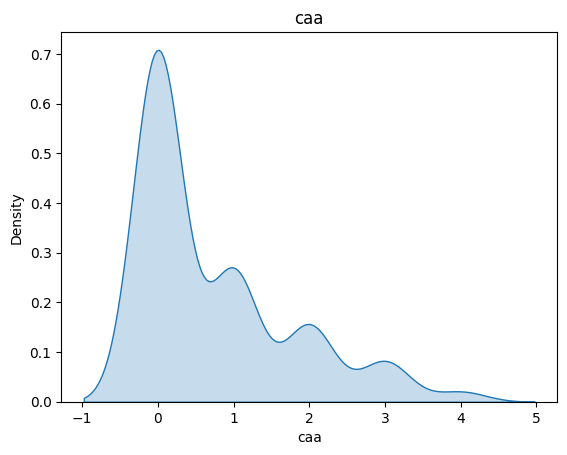

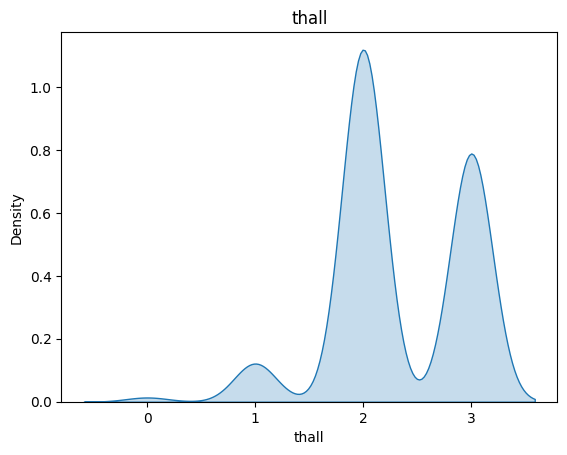

In [7]:
# Define the features and hue as the stress level
features = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh","exng","oldpeak","slp","caa","thall"]
hue = "output"


# To visualize the distribution of the features
for feature in features:
    sns.kdeplot(df[feature], fill=True)
    plt.title(feature)
    plt.show()

<Axes: >

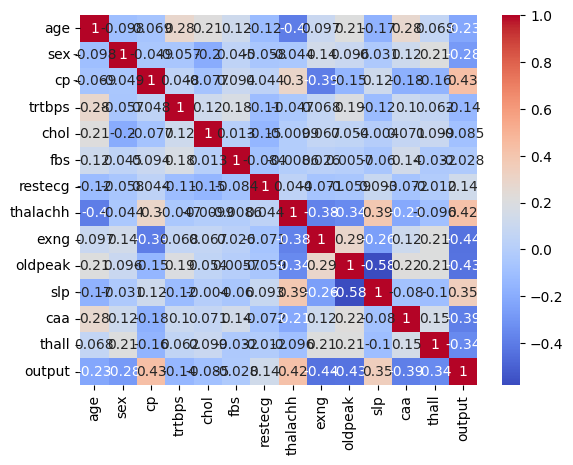

In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()
cor = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)


In [27]:
# Data preprocessing 
# Split the data into training and testing datasets

X = df.drop('output', axis=1) 
y = df['output'] 

# Split the data into training and testing datasets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = svm.SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

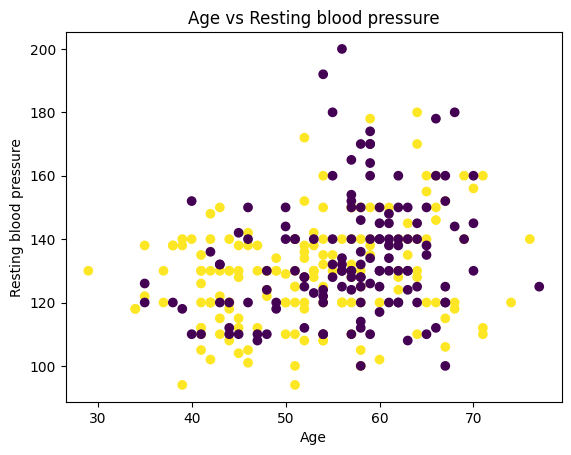

In [17]:
# Plot the heart data on a scatter plot

colors = {0:'red', 1:'blue'}
plt.scatter(df['age'], df['trtbps'], c=[df['output']])
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.title('Age vs Resting blood pressure')
plt.show()

In [28]:
#Predict the response for test database
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8688524590163934
Precision: 0.875
Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [ ]:
# 2

In [23]:
# C = 10, Kernel = poly
svm1 = SVC(kernel='poly', C=10)
svm1.fit(X_train, y_train)

y_pred = svm1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Confusion Matrix:
 [[24  5]
 [ 6 26]]


In [24]:
# C = 100, Kernel = poly
svm2 = SVC(kernel='poly', C=100)
svm2.fit(X_train, y_train)

y_pred = svm2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8360655737704918
Precision: 0.84375
Confusion Matrix:
 [[24  5]
 [ 5 27]]


In [25]:
# C = 1000, Kernel = poly
svm3 = SVC(kernel='poly', C=1000)
svm3.fit(X_train, y_train)

y_pred = svm3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Confusion Matrix:
 [[24  5]
 [ 4 28]]


In [26]:
# C = 10, Kernel = linear
svm4 = SVC(kernel='linear', C=10)
svm4.fit(X_train, y_train)

y_pred = svm4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.9032258064516129
Confusion Matrix:
 [[26  3]
 [ 4 28]]


In [ ]:
# 3

In [29]:
import numpy as np

# define the parameter grid
param_grid = {'C': np.logspace(0.1, 1, 10, 100), 'kernel': ['linear', 'poly', 'rbf']}

# create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 1.5848931924611136, 'kernel': 'linear'}
Best score:  0.8139455782312925


In [ ]:
# 4

In [30]:
from scipy.stats import uniform, randint

# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=20, cv=5)

# fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# print the best parameters and the corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best parameters:  {'kernel': 'linear', 'C': 2.51188643150958}
Best score:  0.8139455782312925


In [34]:
def train_models(models_with_parameters, X_train, y_train):
    best_model = None
    best_score = 0
    for model, params in models_with_parameters.items():
        grid = GridSearchCV(model, params, cv=5)
        grid.fit(X_train, y_train)
        print("Model: ", type(model).__name__)
        print("Best parameters: ", grid.best_params_)
        print("Best score: ", grid.best_score_, '\n')
        if grid.best_score_ > best_score:
            best_model = grid.best_estimator_
            best_score = grid.best_score_
    return best_model


In [35]:
models_with_parameters = {
    SVC(): {'C': [0.1, 1, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

best_model = train_models(models_with_parameters, X_train, y_train)


Model:  SVC
Best parameters:  {'C': 100, 'kernel': 'linear'}
Best score:  0.8221938775510204 

Model:  KNeighborsClassifier
Best parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
Best score:  0.6777210884353742 

